In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('titanic/train.csv')
test_df = pd.read_csv('titanic/test.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## EDA

In [5]:
df.shape

(891, 12)

In [6]:
df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [7]:
# Information about the train dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
# Information about the test dataset
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [9]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

We can conclude that 77% of the train data and 78% of test data in column 'Cabin' is missing so we can drop the column 'Cabin'. And missing value of column Age and Embarked should be replaced.

In [11]:
# Droping the Cabin Column 
df.drop(columns=['Cabin'], inplace=True)
test_df.drop(columns=['Cabin'], inplace=True)


In [12]:
# Filling the missing value of the Age column by the mean of the column
df['Age'].fillna(df['Age'].mean(), inplace=True)
test_df['Age'].fillna(df['Age'].mean(), inplace=True)

In [13]:
# Filling the missing value of the Embarke column by the most frequent value of Embarked column which is 'S' 
df['Embarked'].fillna(df['Embarked'].value_counts().idxmax(), inplace=True)
test_df['Embarked'].fillna(df['Embarked'].value_counts().idxmax(), inplace=True)

In [14]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [15]:
test_df.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [17]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 32.8+ KB


In [18]:
df['Survived'] = df['Survived'].astype('category')
df['Pclass'] = df['Pclass'].astype('category')
df['Sex'] = df['Sex'].astype('category')
df['Age'] = df['Age'].astype('int')
df['Embarked'] = df['Embarked'].astype('category')

In [19]:
test_df['Pclass'] = test_df['Pclass'].astype('category')
test_df['Sex'] = test_df['Sex'].astype('category')
test_df['Age'] = test_df['Age'].astype('int')
test_df['Embarked'] = test_df['Embarked'].astype('category')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          891 non-null    int32   
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Embarked     891 non-null    category
dtypes: category(4), float64(1), int32(1), int64(3), object(2)
memory usage: 49.4+ KB


In [21]:
df.describe()

,PassengerId,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,29.544332,0.523008,0.381594,32.204208
std,257.353842,13.013778,1.102743,0.806057,49.693429
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,29.000000,0.000000,0.000000,14.454200
75%,668.500000,35.000000,1.000000,0.000000,31.000000
max,891.000000,80.000000,8.000000,6.000000,512.329200


### **Univariate Analysis**

61.62 % passenger died.


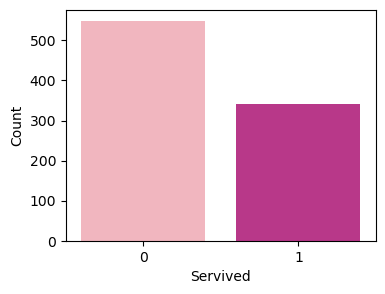

In [22]:
# Univariate Analysis : 'Survived' --> 0 = No, 1 = Yes

print(f"{(df['Survived'].value_counts()/len(df['Survived'])*100).round(2)[0]} % passenger died.")

plt.figure(figsize=(4,3))
sns.barplot(x=df['Survived'].value_counts().index, y=df['Survived'].value_counts(), hue=df['Survived'].value_counts().index, palette='RdPu', legend=False)
plt.xlabel('Servived') 
plt.ylabel('Count')
plt.show()

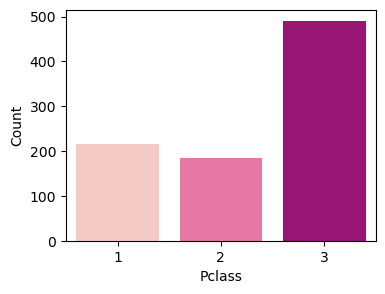

In [23]:
# Univariate Analysis : 'Pclass' --> 1 = 1st Class, 2 = 2nd Class, 3 = 3rd Class
plt.figure(figsize=(4,3))
sns.barplot(x=df['Pclass'].value_counts().index, y=df['Pclass'].value_counts(), hue=df['Pclass'].value_counts().index, palette='RdPu', legend=False)
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.show()

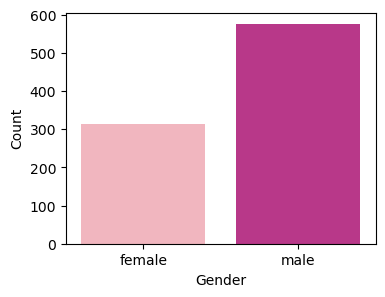

In [24]:
# Univariate Analysis : 'Sex' 
plt.figure(figsize=(4,3))
sns.barplot(x=df['Sex'].value_counts().index, y=df['Sex'].value_counts(), hue=df['Sex'].value_counts().index, palette='RdPu', legend=False)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

0    68.24 %
1    23.46 %
2     3.14 %
4     2.02 %
3      1.8 %
8     0.79 %
5     0.56 %
Name: SibSp, dtype: object


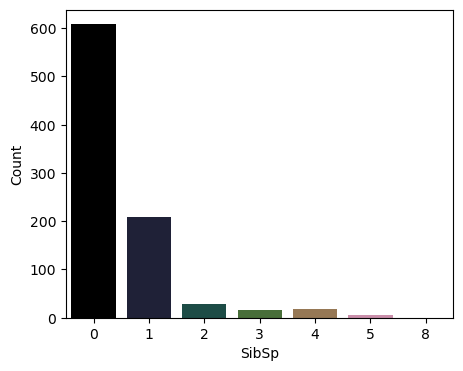

In [25]:
# Univariate Analysis : 'SibSp' 

print(((df['SibSp'].value_counts()/len(df)*100).round(2)).astype(str) + ' %')

plt.figure(figsize=(5,4))
sns.barplot(x=df['SibSp'].value_counts().index, y=df['SibSp'].value_counts(), hue=df['SibSp'].value_counts().index, palette='cubehelix', legend=False)
plt.xlabel('SibSp')
plt.ylabel('Count')
plt.show()

0    76.09 %
1    13.24 %
2     8.98 %
5     0.56 %
3     0.56 %
4     0.45 %
6     0.11 %
Name: Parch, dtype: object


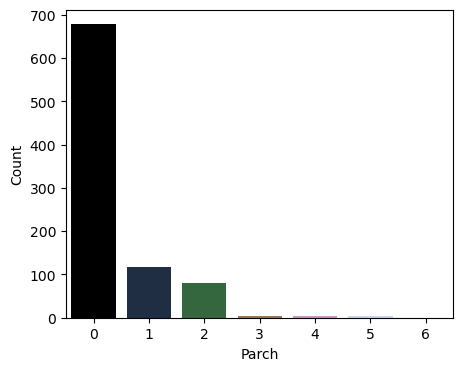

In [26]:
# Univariate Analysis : 'Parch' 

print(((df['Parch'].value_counts()/len(df)*100).round(2)).astype(str) + ' %')

plt.figure(figsize=(5,4))
sns.barplot(x=df['Parch'].value_counts().index, y=df['Parch'].value_counts(), hue=df['Parch'].value_counts().index, palette='cubehelix', legend=False)
plt.xlabel('Parch')
plt.ylabel('Count')
plt.show()

S     72.5 %
C    18.86 %
Q     8.64 %
Name: Embarked, dtype: object


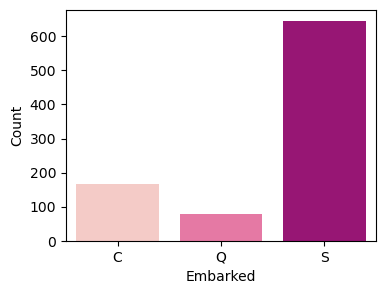

In [27]:
# Univariate Analysis : 'Embarked'--> C = Cherbourg, Q = Queenstown, S = Southampton

print(((df['Embarked'].value_counts()/len(df)*100).round(2)).astype(str) + ' %')

plt.figure(figsize=(4,3))
sns.barplot(x=df['Embarked'].value_counts().index, y=df['Embarked'].value_counts(), hue=df['Embarked'].value_counts().index, palette='RdPu', legend=False)
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.show()

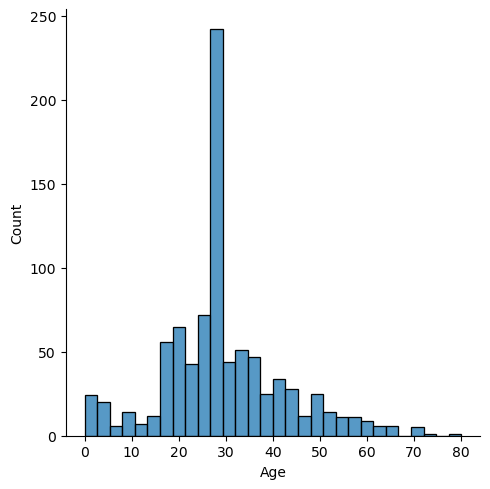

In [28]:
sns.displot(df['Age']) 
plt.show()

'Age' column distributed normally.

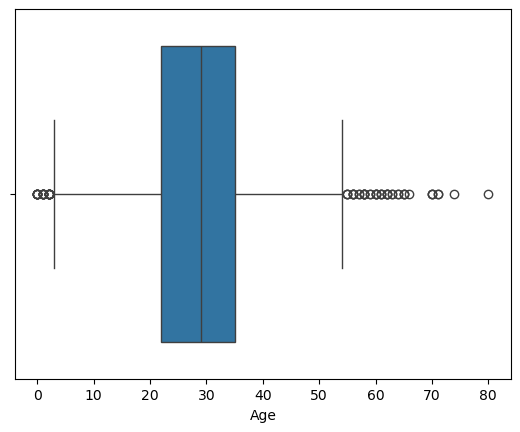

In [29]:
sns.boxplot(df['Age'],orient = 'h')
plt.show()

'Age' column contain outliers.

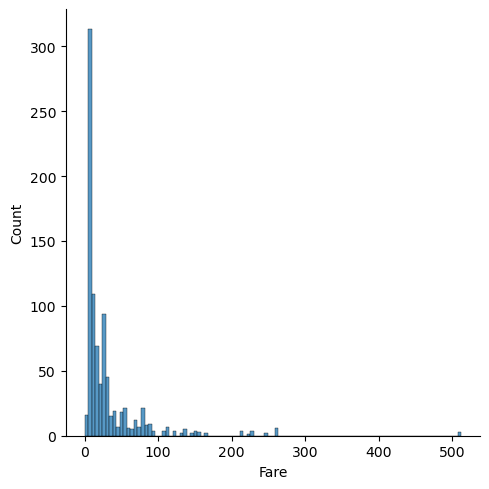

In [30]:
sns.displot(df['Fare'])
plt.show()

'Fare' column is right skewed.

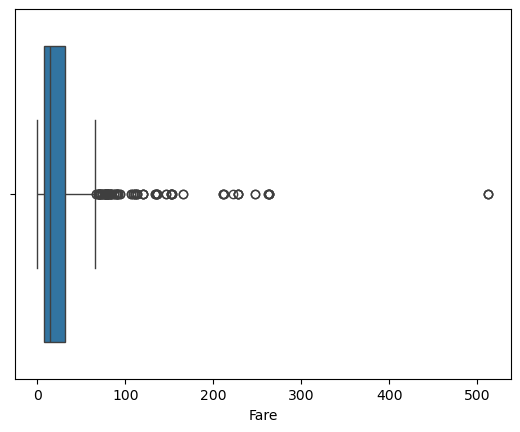

In [31]:
sns.boxplot(df['Fare'],orient = 'h')
plt.show()

'Fare' column have outliers.

### **Multivariate Analysis**

In [32]:
# Multivariate Analysis : 'Survived' with 'Pclass'
pd.crosstab(df['Pclass'], df['Survived']).apply(lambda r : (r/r.sum()*100).round(2).astype(str) + " %")

Survived,0,1
Pclass,,
1,14.57 %,39.77 %
2,17.67 %,25.44 %
3,67.76 %,34.8 %


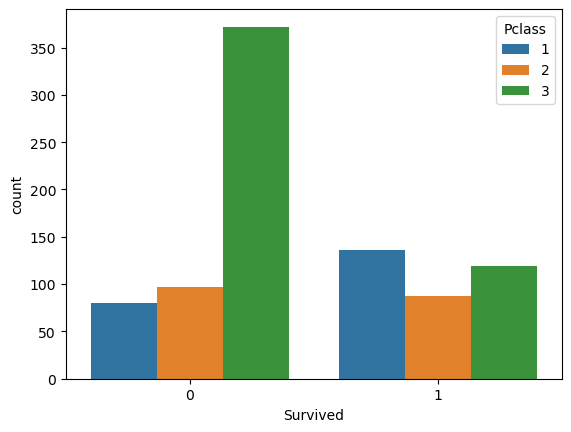

In [33]:
sns.countplot(data=df, x='Survived', hue='Pclass')
plt.show()

In [34]:
# Multivariate Analysis : 'Survived' with 'Sex'
pd.crosstab(df['Sex'], df['Survived']).apply(lambda r : (r/r.sum()*100).round(2).astype(str) + " %")

Survived,0,1
Sex,,
female,14.75 %,68.13 %
male,85.25 %,31.87 %


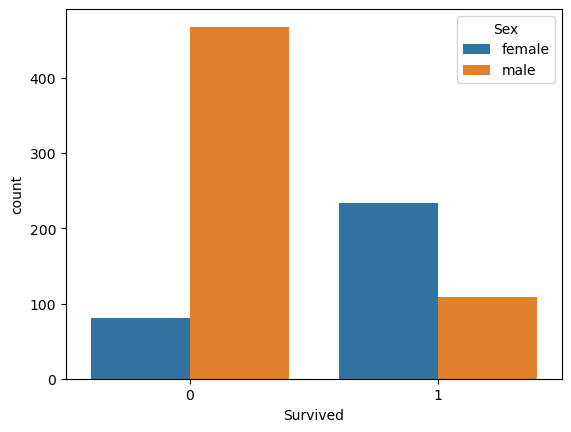

In [35]:
sns.countplot(data=df, x='Survived', hue='Sex')
plt.show()

In [36]:
# Multivariate Analysis : 'Survived' with 'Embarked'
pd.crosstab(df['Embarked'], df['Survived']).apply(lambda r : (r/r.sum()*100).round(2).astype(str) + " %")

Survived,0,1
Embarked,,
C,13.66 %,27.19 %
Q,8.56 %,8.77 %
S,77.78 %,64.04 %


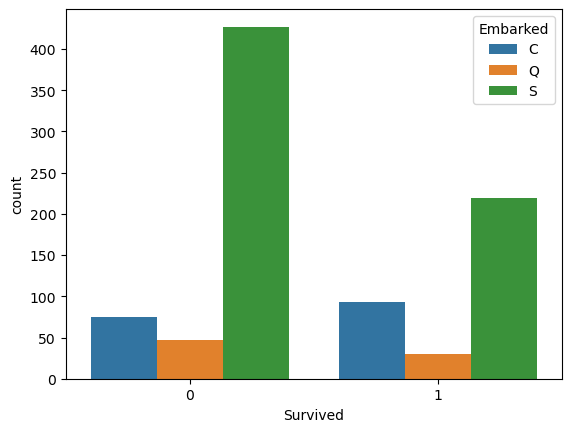

In [37]:
sns.countplot(data=df, x='Survived', hue='Embarked')
plt.show()

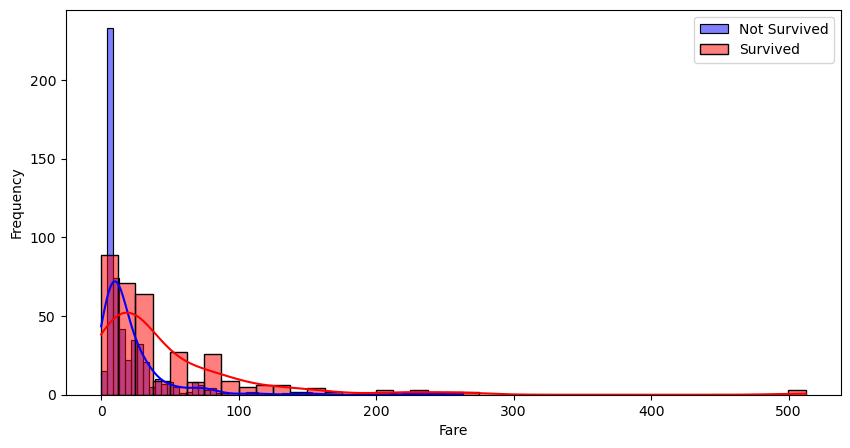

In [38]:
# Multivariate Analysis : 'Survived' with 'Fare'
plt.figure(figsize=(10,5))
sns.histplot(df[df['Survived'] == 0]['Fare'], color='blue', label='Not Survived', kde=True)
sns.histplot(df[df['Survived'] == 1]['Fare'], color='red', label='Survived', kde=True)
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.legend()
plt.show()

People who pay a higher fare are more likely to survive than those who pay less.

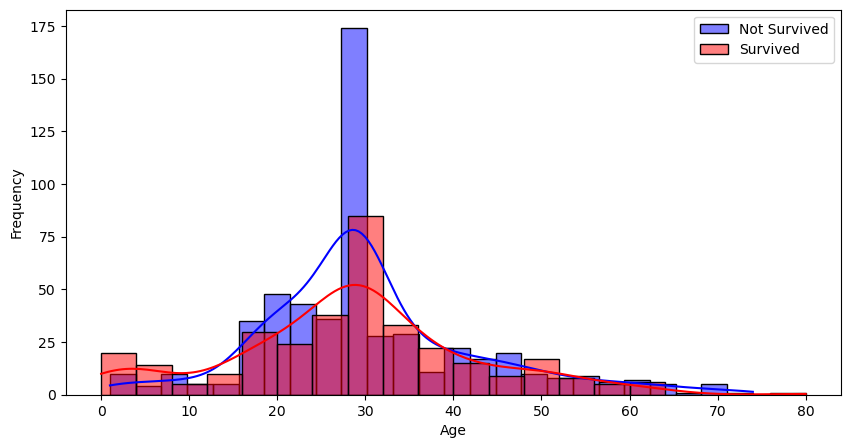

In [39]:
# Multivariate Analysis : 'Survived' with 'Age'
plt.figure(figsize=(10,5))
# Plotting the histogram for 'Age' where 'Survived' is 0
sns.histplot(df[df['Survived'] == 0]['Age'], color='blue', label='Not Survived', kde=True)
# Plotting the histogram for 'Age' where 'Survived' is 1
sns.histplot(df[df['Survived'] == 1]['Age'], color='red', label='Survived', kde=True)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()

Younger people are more likely to survive compared to those in the age group of 25 to 40.

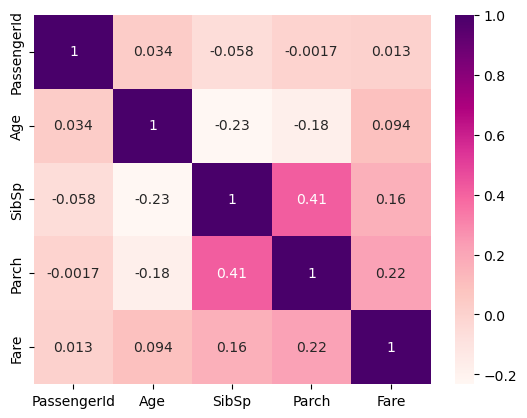

In [40]:
sns.heatmap(df.corr(), annot=True, cmap='RdPu')
plt.show()

### **Feature Engineering**

In [41]:
# Creating a new column 'Name_Prefix'
df["Name_Prefix"] = df["Name"].str.extract(' ([A-Za-z]+)\.', expand = False)
test_df["Name_Prefix"] = test_df["Name"].str.extract(' ([A-Za-z]+)\.', expand = False)

In [42]:
df['Name_Prefix'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Name_Prefix, dtype: int64

In [43]:
# Now we going to bulid three class 'Mr.', 'Mrs.', 'Miss.' and 'Others'.Mapping define as [Mr, Master] : 0, [Miss, Mlle, Ms] : 1, [Mrs, Mme, Lady] : 2, Others : 3
df['Name_Prefix'] = df['Name_Prefix'].map({
    'Mr'       : 0,
    'Miss'     : 1,
    'Mrs'      : 2,
    'Master'   : 0,
    'Dr'       : 3,
    'Rev'      : 3,
    'Mlle'     : 1,
    'Major'    : 3,
    'Col'      : 3,
    'Countess' : 3,
    'Capt'     : 3,
    'Ms'       : 1,
    'Sir'      : 3,
    'Lady'     : 2,
    'Mme'      : 2,
    'Don'      : 3,
    'Jonkheer' : 3    
})

In [44]:
test_df['Name_Prefix'] = test_df['Name_Prefix'].map({
    'Mr'       : 0,
    'Miss'     : 1,
    'Mrs'      : 2,
    'Master'   : 0,
    'Dr'       : 3,
    'Rev'      : 3,
    'Mlle'     : 1,
    'Major'    : 3,
    'Col'      : 3,
    'Countess' : 3,
    'Capt'     : 3,
    'Ms'       : 1,
    'Sir'      : 3,
    'Lady'     : 2,
    'Mme'      : 2,
    'Don'      : 3,
    'Jonkheer' : 3    
})

In [45]:
df.sample()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Name_Prefix
431,432,1,3,"Thorneycroft, Mrs. Percival (Florence Kate White)",female,29,1,0,376564,16.1,S,2


In [46]:
test_df.sample()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Name_Prefix
401,1293,2,"Gale, Mr. Harry",male,38,1,0,28664,21.0,S,0.0


In [47]:
pd.crosstab(df['Name_Prefix'], df['Survived']).apply(lambda x : (x/x.sum()*100).round(2))

Survived,0,1
Name_Prefix,,
0,82.51,30.41
1,10.02,38.01
2,4.74,29.53
3,2.73,2.05


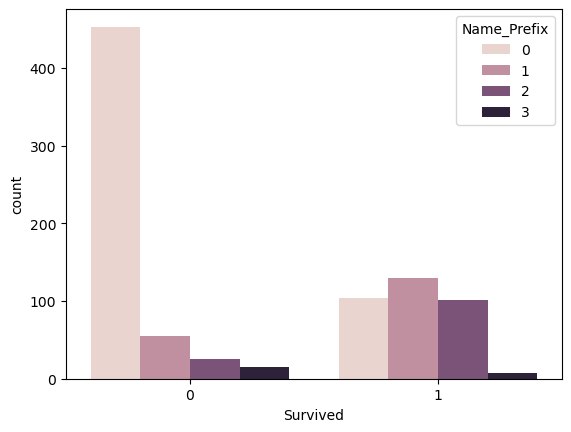

In [48]:
sns.countplot(data=df, x='Survived', hue='Name_Prefix') #[Mr, Master] : 0, [Miss, Mlle, Ms] : 1, [Mrs, Mme, Lady] : 2, Others : 3
plt.show()

People with name prefix 1 are more likely to survive than others.

In [49]:
# Remove the 'Name' column
df.drop(columns=['Name'], inplace=True)
test_df.drop(columns=['Name'], inplace=True)

In [50]:
# Creating a new column name 'Family_Size'
df['Family_Size'] = df['Parch'] + df['SibSp']
test_df['Family_Size'] = test_df['Parch'] + test_df['SibSp']
df.sample(3)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Name_Prefix,Family_Size
490,491,0,3,male,29,1,0,65304,19.9667,S,0,1
683,684,0,3,male,14,5,2,CA 2144,46.9000,S,0,7
445,446,1,1,male,4,0,2,33638,81.8583,S,0,2


In [51]:
def family_type(i):
    if i == 0:
        return 'Alone'
    elif i>0 and i<=4:
        return 'Meduim'
    else:
        return 'large'

In [52]:
df['Family_Type'] = df['Family_Size'].apply(family_type)
test_df['Family_Type'] = test_df['Family_Size'].apply(family_type)

In [53]:
df.head(3)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Name_Prefix,Family_Size,Family_Type
0,1,0,3,male,22,1,0,A/5 21171,7.2500,S,0,1,Meduim
1,2,1,1,female,38,1,0,PC 17599,71.2833,C,2,1,Meduim
2,3,1,3,female,26,0,0,STON/O2. 3101282,7.9250,S,1,0,Alone


In [54]:
pd.crosstab(df['Family_Type'], df['Survived']).apply(lambda x : (x/x.sum()*100).round(2))

Survived,0,1
Family_Type,,
Alone,68.12,47.66
Meduim,24.59,50.29
large,7.29,2.05


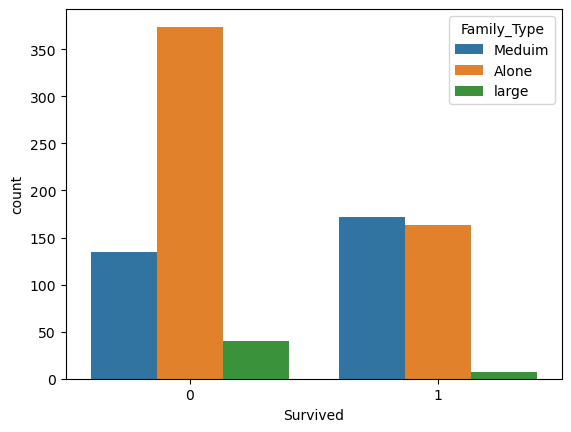

In [55]:
sns.countplot(data=df, x='Survived', hue='Family_Type')
plt.show()

We can conclude that people having family type of meduim are more likely to servive.

In [56]:
df.drop(columns=['SibSp', 'Parch', 'Family_Size'], inplace=True)
test_df.drop(columns=['SibSp', 'Parch', 'Family_Size'], inplace=True)

In [57]:
df.sample()

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Embarked,Name_Prefix,Family_Type
695,696,0,2,male,52,248731,13.5,S,0,Alone


In [58]:
df = df[df['Age']<(df['Age'].mean() + 3*df['Age'].std())] # As 'Age' column distributed normal
test_df = test_df[test_df['Age']<(df['Age'].mean() + 3*df['Age'].std())]

In [59]:
Q1 = np.percentile(df['Fare'], 25)
Q3 = np.percentile(df['Fare'], 75)

outlier_low = Q1 - 1.5 * (Q3 - Q1)
outlier_high = Q3 + 1.5 * (Q3 - Q1)

df = df[(df['Fare']>outlier_low) & (df['Fare']<outlier_high)]
test_df = test_df[(test_df['Fare']>outlier_low) & (test_df['Fare']<outlier_high)]

In [60]:
df.shape

(769, 10)

In [61]:
# OneHotEncoding
df = pd.get_dummies(data=df, columns=['Pclass', 'Sex', 'Embarked', 'Family_Type'], drop_first=True)
test_df = pd.get_dummies(data=test_df, columns=['Pclass', 'Sex', 'Embarked', 'Family_Type'], drop_first=True)

In [62]:
df.head()

,PassengerId,Survived,Age,Ticket,Fare,Name_Prefix,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,Family_Type_Meduim,Family_Type_large
0,1,0,22,A/5 21171,7.2500,0,0,1,1,0,1,1,0
2,3,1,26,STON/O2. 3101282,7.9250,1,0,1,0,0,1,0,0
3,4,1,35,113803,53.1000,2,0,0,0,0,1,1,0
4,5,0,35,373450,8.0500,0,0,1,1,0,1,0,0
5,6,0,29,330877,8.4583,0,0,1,1,1,0,0,0


In [63]:
test_df.head()

,PassengerId,Age,Ticket,Fare,Name_Prefix,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,Family_Type_Meduim,Family_Type_large
0,892,34,330911,7.8292,0.0,0,1,1,1,0,0,0
1,893,47,363272,7.0000,2.0,0,1,0,0,1,1,0
2,894,62,240276,9.6875,0.0,1,0,1,1,0,0,0
3,895,27,315154,8.6625,0.0,0,1,1,0,1,0,0
4,896,22,3101298,12.2875,2.0,0,1,0,0,1,1,0


In [64]:
X = df.drop(columns=['Survived', 'Ticket'])
y = df['Survived'].values

In [65]:
test_df = test_df.drop(columns=['Ticket'])

In [66]:
# Saving the final Test DataFream
test_df.to_csv('final_test.csv')

### **Standardization of the Data**

In [67]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

### **Spliting the dataset into test set and train set**

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=1)

## Model Bulidling

### **K-Nearest Neighbor Algorithm**

In [69]:
from sklearn.neighbors import KNeighborsClassifier

acc = []

for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    acc.append(accuracy_score(y_test,y_pred))

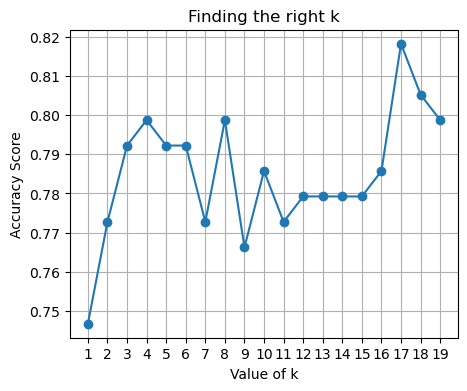

In [70]:
plt.figure(figsize=(5,4))
plt.plot(range(1,20),acc, marker = "o")
plt.xlabel("Value of k")
plt.ylabel("Accuracy Score")
plt.title("Finding the right k")
plt.xticks(range(1,20))
plt.grid()
plt.show()

In [71]:
knn = KNeighborsClassifier(n_neighbors = 17)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
acc_knn = accuracy_score(y_test, y_pred)
print(f'For K = 17 giving the accuracy of {acc_knn*100 : .2f} %')

For K = 17 giving the accuracy of  81.82 %


### **Decision Tree Algorithm**

In [72]:
from sklearn.tree import DecisionTreeClassifier

depth = []

for i in range(1,8):
    clf_tree = DecisionTreeClassifier(criterion="entropy", random_state = 100, max_depth = i)
    clf_tree.fit(X_train,y_train)
    y_pred = clf_tree.predict(X_test)
    depth.append(accuracy_score(y_test,y_pred))

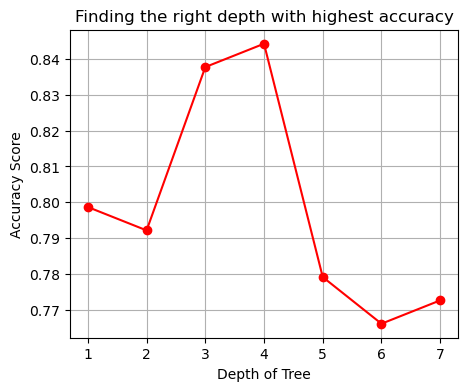

In [73]:
plt.figure(figsize=(5,4))
plt.plot(range(1,8),depth,color="red", marker = "o")
plt.xlabel("Depth of Tree")
plt.ylabel("Accuracy Score")
plt.title("Finding the right depth with highest accuracy")
plt.xticks(range(1,8))
plt.grid()
plt.show()

In [74]:
dt = DecisionTreeClassifier(criterion="entropy", random_state = 100, max_depth = 4)
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
acc_dt = accuracy_score(y_test, y_pred)
print(f'Max depth = 4 giving the accuracy of {acc_dt*100 : .2f} %')

Max depth = 4 giving the accuracy of  84.42 %


### **Random Forest Algorithm**

In [75]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)
acc_rfc = accuracy_score(y_test,y_pred)
print(f"Accuracy for n_estimators = 50 is {acc_rfc*100 : .2f} %")

Accuracy for n_estimators = 50 is  82.47 %


### **Support Vector Machine**

In [76]:
from sklearn.svm import SVC
svm = SVC(kernel='linear',gamma='auto')
svm.fit(X_train,y_train)
y_pred = svm.predict(X_test)
acc_svm = accuracy_score(y_test,y_pred) 
print(f"Accuracy is {acc_svm*100 : .2f} %")

Accuracy is  81.82 %


### **Logistic Regression Algorithm**

In [77]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
acc_lr = accuracy_score(y_test,y_pred)
print(f"Accuracy is {acc_lr*100 : .2f} %")

Accuracy is  79.22 %


### **Naive Bayes**

In [78]:
from sklearn.naive_bayes import GaussianNB
clf_NB = GaussianNB()
clf_NB.fit(X_train,y_train)
y_pred = clf_NB.predict(X_test)
acc_nb = accuracy_score(y_test,y_pred)
print(f"Accuracy is : {acc_nb*100 : .2f}%")

Accuracy is :  75.32%


### **XGBoost Classifier**

In [79]:
from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators=50, random_state=2)
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
acc_xg = accuracy_score(y_test,y_pred)
print(f"Accuracy is : {acc_xg*100 : .2f}%")

Accuracy is :  77.92%


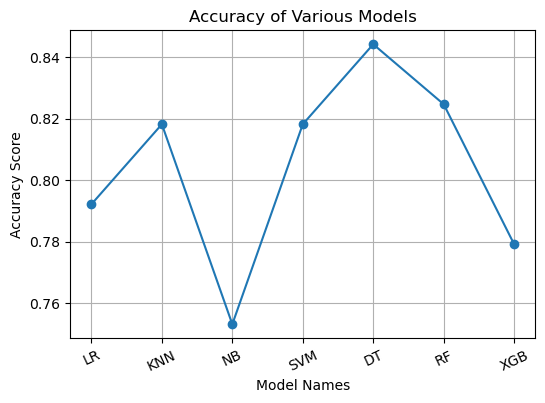

In [80]:
accuracy_list = [acc_lr, acc_knn, acc_nb, acc_svm, acc_dt, acc_rfc, acc_xg]
model_list = ['LR', 'KNN', 'NB', 'SVM', 'DT', 'RF', 'XGB']

plt.figure(figsize=(6,4))
plt.plot(range(1,8),accuracy_list,marker='o')
plt.xticks(range(1,8),model_list,rotation=25)
plt.title('Accuracy of Various Models')
plt.xlabel('Model Names')
plt.ylabel("Accuracy Score")
plt.grid()
plt.show()

### `Conclusion:` **Decision Tree** Model gives the best accuracy.

### **Prediction on Test DataSet**

In [89]:
# Apply on final test dataset
test = pd.read_csv('final_test.csv').drop(columns=['Unnamed: 0'])
test_sc = sc.transform(test)

In [99]:
y_pred = dt.predict(test_sc)

In [102]:
result = pd.DataFrame(np.concatenate((test['PassengerId'].values.reshape(-1,1), y_pred.reshape(-1,1)), axis=1))
result.columns = ['PassengerId', 'Survived']

In [118]:
result.head(15)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,0
7,899,0
8,900,1
9,901,0
